In [ ]:
#General Imports
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
def load_dataset(dataset_name):
    if dataset_name == 'cifar10':
       (x_train, y_train), (x_test, y_test) = cifar10.load_data()
       num_classes = 10
    else:
       raise ValueError("Dataset is not supported")

    #Data preprocessing
    x_train, x_test = x_train / 255.0, x_test / 255.0

    #one-hot encoding
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    return x_train, y_train, x_test, y_test, num_classes

In [ ]:
def train_model(dataset_name):
    x_train, y_train, x_test, y_test, num_classes = load_dataset(dataset_name)

    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    #Fine-tuning
    base_model.trainable = True
    for layer in base_model.layers[:-15]:
        layer.trainable = False

    #Fully-connected layer
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)

    fine_tuning_model = Model(inputs=base_model.input, outputs=x)

    #Compile model
    fine_tuning_model.compile(
        optimizer= Adam(5.5e-6),#1e-5 and 1e-6
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    #Data Augmentation
    datagen = ImageDataGenerator(
        rotation_range= 15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)

    #fit
    history1 = fine_tuning_model.fit(
        datagen.flow(x_train, y_train, batch_size=32),
        validation_data = (x_test, y_test),
        epochs=20,
        batch_size=32
    )

    #plot the data
    plt.plot(history1.history['accuracy'], label=f'{dataset_name} Train Accuracy')
    plt.plot(history1.history['val_accuracy'], label=f'{dataset_name} Validation Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 64ms/step - accuracy: 0.2481 - loss: 2.0527 - val_accuracy: 0.6311 - val_loss: 1.0561
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.5551 - loss: 1.3048 - val_accuracy: 0.6981 - val_loss: 0.8880
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6472 - loss: 1.0734 - val_accuracy: 0.7173 - val_loss: 0.8656
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6840 - loss: 0.9647 - val_accuracy: 0.7514 - val_loss: 0.7377
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.7155 - loss: 0.8759 - val_accuracy: 0.7636 - val_loss: 0.7052
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.7294 - loss: 0.8364 - val_accuracy: 0.7558 - val_loss: 0.7458
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.7513 - loss: 0.7752 - val_accuracy: 0.7794 - val_loss: 0.6776
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.7608 - loss: 0.7

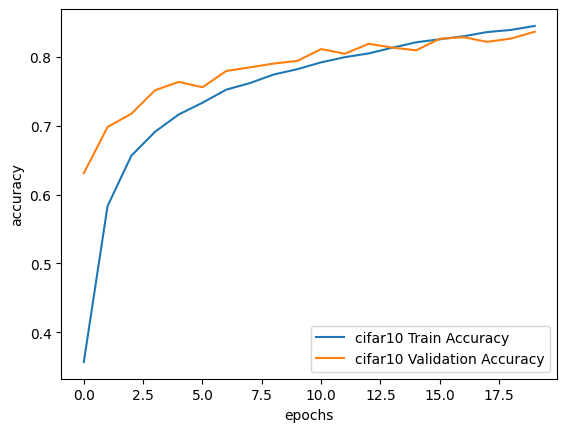

In [ ]:
train_model('cifar10')